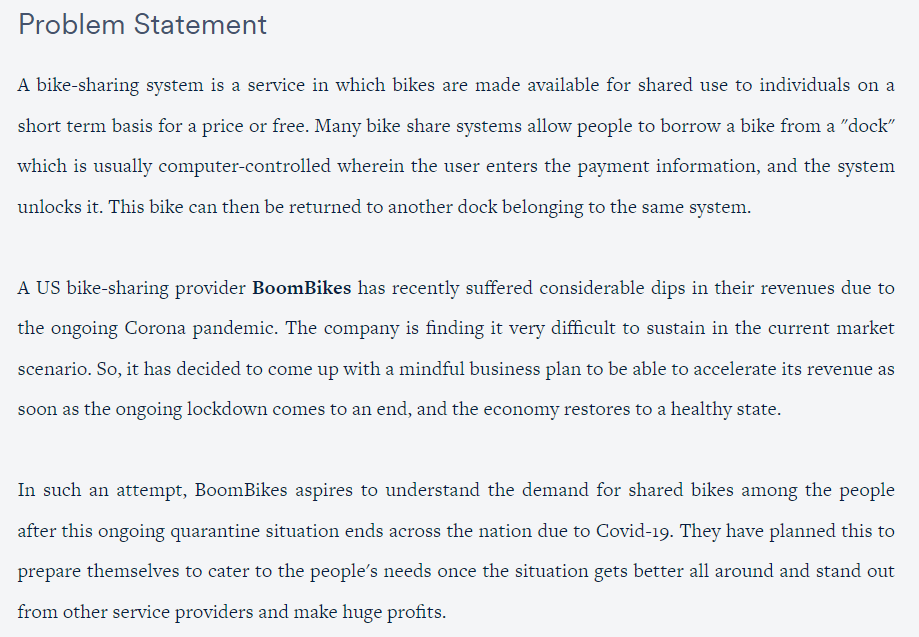
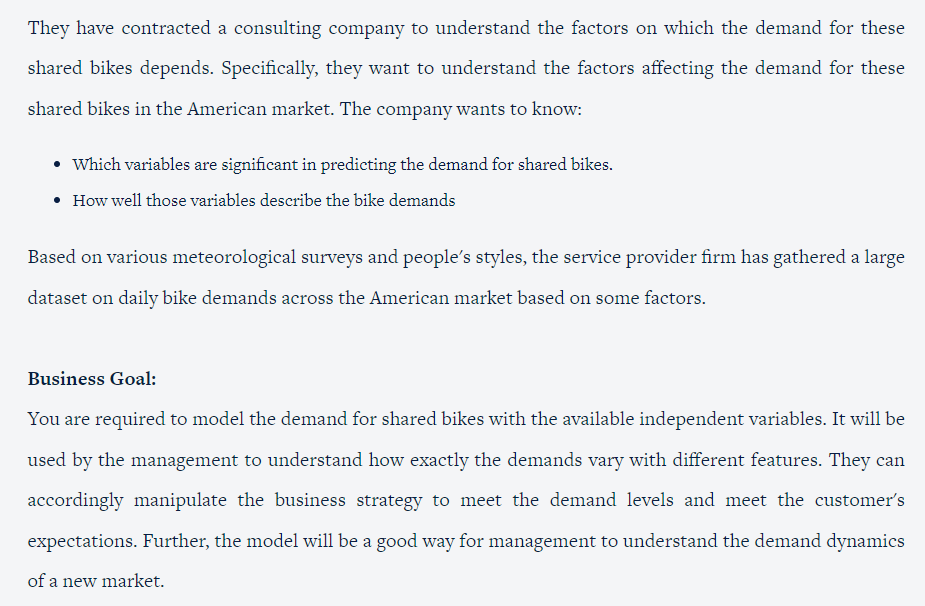

## Steps or Summary :
- Import Necessary Libraries
- Load the Data and Understanding the Data
- Missing Value Check
- Segmentation of Column
- Exploratory Data Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)
- Data Preparation Steps : Dummy Variable Creation (One Hot Encoding)
- Train-Test Split : Splitting the Data into Training and Testing Sets
- Feature Scaling : Min-Max scaling( Normalization ) 
- Feature Selection : Using RFE and Manual Selection methods
- Building the initial linear model
- Residual Analysis of the train data
- Making Predictions using the final linear model
- Steps for Further Model Refinement and Optimization
- Model Evaluation

## Step 1 : Importing Necessary Libraries

In [1]:
import numpy as np , pandas as pd
import matplotlib
import matplotlib.pyplot as plt , seaborn as sns
from matplotlib import style
sns.set(style='whitegrid')

import statsmodels as sml
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### warnings
import warnings
warnings.filterwarnings('ignore')
#calender
import calendar

### Check the version of libraries and upgrade before analysis if required 
##### Versions used during development
    numpy 1.26.4
    pandas 2.2.2
    matplotlib 3.9.0
    seaborn 0.13.2
    statsmodels 0.14.0
    sklearn 1.3.0

In [2]:
print('numpy' , np.__version__)
print('pandas' ,pd.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn' ,sns.__version__)
print('statsmodels', sml.__version__)
print('sklearn', skl.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.0
seaborn 0.13.2
statsmodels 0.14.0
sklearn 1.3.0


## Step 2 : Load and Understand the Data

In [3]:
boombikes=pd.read_csv('day.csv')

In [4]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boombikes.shape

(730, 16)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As per the Data Dictionary , variable "instant" is the index of the each record in the data , hence let's make it the index of the dataframe

In [7]:
boombikes.set_index("instant",inplace=True)

In [8]:
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
boombikes.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Renaming few of the columns for better readibility

In [11]:
boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
boombikes.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### There are some categorical variables which have a range of numeric data. Lets convert them

In [12]:
# converting yr
year_dict={0:'2018',1:'2019'}
boombikes['year'] = boombikes['year'].map(year_dict)
# converting month
month_dict={ i:calendar.month_abbr[i] for i in range(1,13)  }
boombikes['month'] = boombikes['month'].map(month_dict)
# converting season
season_dict={1:'spring',2:'summer',3:'fall',4:'winter'}
boombikes.season = boombikes.season.map(season_dict)
# converting weathersit
weathersit_dict={1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'}
boombikes.weathersit = boombikes.weathersit.map(weathersit_dict)
# converting weekday
weekday_dict={0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thrusday",5:"friday",6:"saturday"}
boombikes.weekday = boombikes.weekday.map(weekday_dict)

In [13]:
cat_cols_dict = { "year_dict":year_dict,
         "month_dict":month_dict,
         "weekday_dict":weekday_dict,
         "season_dict":season_dict,
         "weathersit_dict":weathersit_dict
}

#### We actually dont need the "dteday" column since there are separate columns for month and day . Let's drop "dteday" column

In [14]:
boombikes.drop('dteday', inplace=True, axis=1)

In [15]:
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,
1,spring,2018,Jan,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
2,spring,2018,Jan,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
3,spring,2018,Jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,spring,2018,Jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,spring,2018,Jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Our target variable ins "cnt" - which denotes the count of total rental bikes including both "casual" and "registered". Since "casual" and "registered" is just a breakup of count variable, let's drop it also as it is redundant for our analysis 

In [16]:
boombikes.drop(['casual','registered'], inplace=True, axis=1)

## Step 3 : Missing Value Check

In [17]:
boombikes.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

#### Observation - No null record is found in the data

## Step 4 : Segmentation of Columns

In [18]:
boombikes.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

#### We actually dont need the 'dteday' column since there are separate columns for month and day

In [19]:
num_cols=["temp","atemp","humidity","windspeed","count"]
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"]

## Step 5: Exploratory Data Analysis

## Univariate Analysis

### Numerical Columns

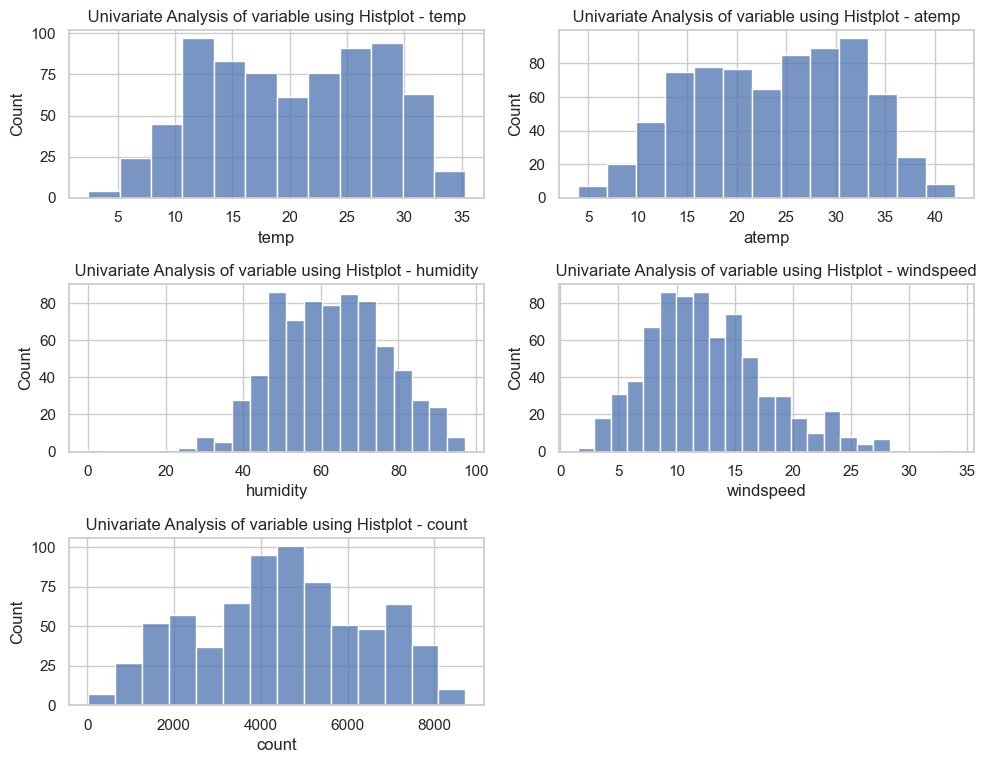

In [20]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.histplot( x=boombikes[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Histplot - {col} ' )
plt.tight_layout()
plt.show()

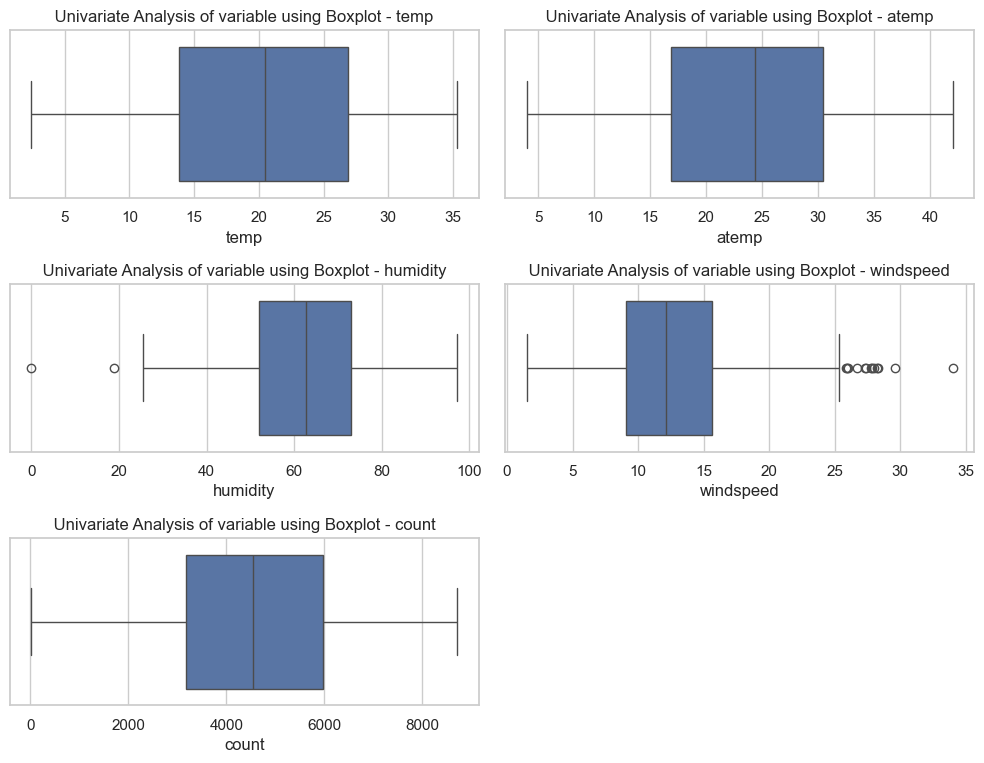

In [21]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=boombikes[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

In [22]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove outliers
        df = df[ (df[col] >= lower_bound) & (df[col] <= upper_bound) ]
        print(f" Current Shape after removing outliers of {col}  : " , df.shape)
    return df

In [23]:
# Removing the outliers
#boombikes=remove_outliers(boombikes,num_cols)

In [24]:
for i in num_cols:
    print(f'Quartile info for variable {i} - ' , np.quantile( boombikes[i] , [0.00,0.01, 0.02 ,0.03,0.04,0.05 , 0.25, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1] ) )

Quartile info for variable temp -  [ 2.4243464   5.98547028  6.89098972  7.46369863  8.05196048  8.74702405
 13.81188525 20.4658265  26.88061475 29.998347   31.5204597  32.05278689
 32.99953552 33.86805    35.328347  ]
Quartile info for variable atemp -  [ 3.95348    7.2904925  8.112616   9.4065905 10.221912  11.0307125
 16.8897125 24.368225  30.445775  33.90821   35.749975  36.62907
 37.4401    38.94165   42.0448   ]
Quartile info for variable humidity -  [ 0.       31.209593 35.755014 38.102619 40.013328 40.741735 52.
 62.625    72.989575 81.7625   86.868735 89.54055  90.830814 92.795857
 97.25    ]
Quartile info for variable windspeed -  [ 1.5002439   3.54899255  4.1495311   4.45853289  4.9238091   5.32605211
  9.04165    12.125325   15.62558925 19.8339966  22.9999878  23.99916684
 25.20162656 27.38094762 34.000021  ]
Quartile info for variable count -  [  22.    689.38  971.76 1025.18 1162.8  1330.   3169.75 4548.5  5966.
 7293.8  7576.4  7733.39 7867.1  8163.81 8714.  ]


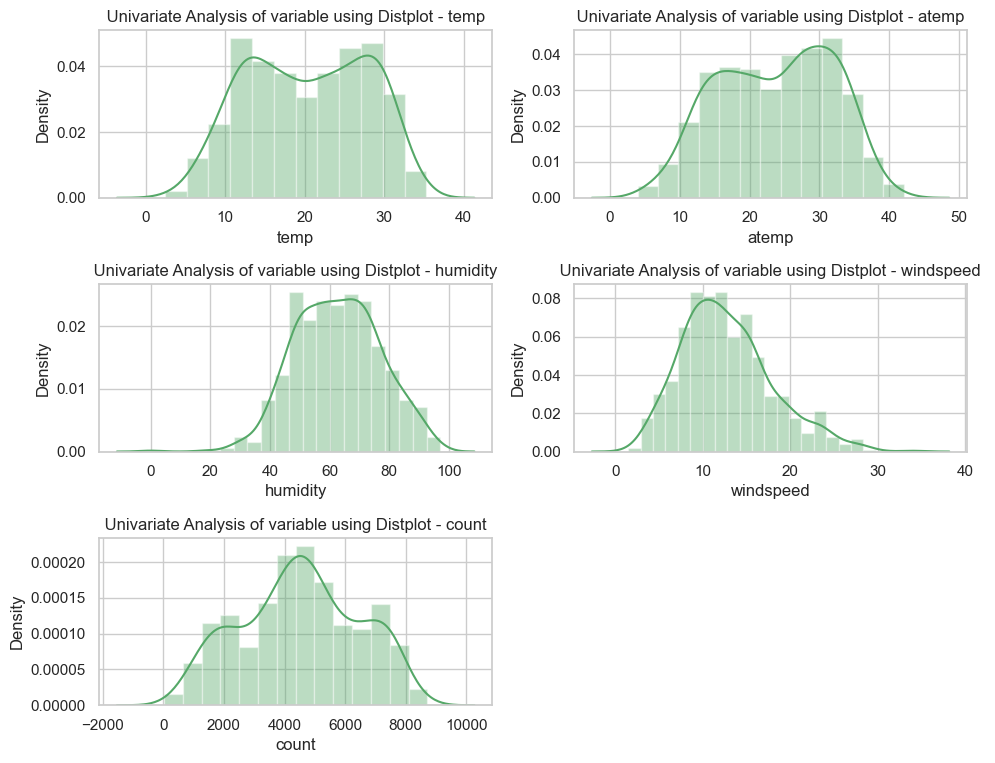

In [25]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.distplot( boombikes[col] , color='#55A868' )
    plt.title( f' Univariate Analysis of variable using Distplot - {col} ' )
plt.tight_layout()
plt.show()

#### Observation - 
    1. The distributions appear to be normal and balanced.
    2. The percentile values are consistent and show a continuous pattern.
    3. No outlier treatment is needed right now. 

### Categorical Columns

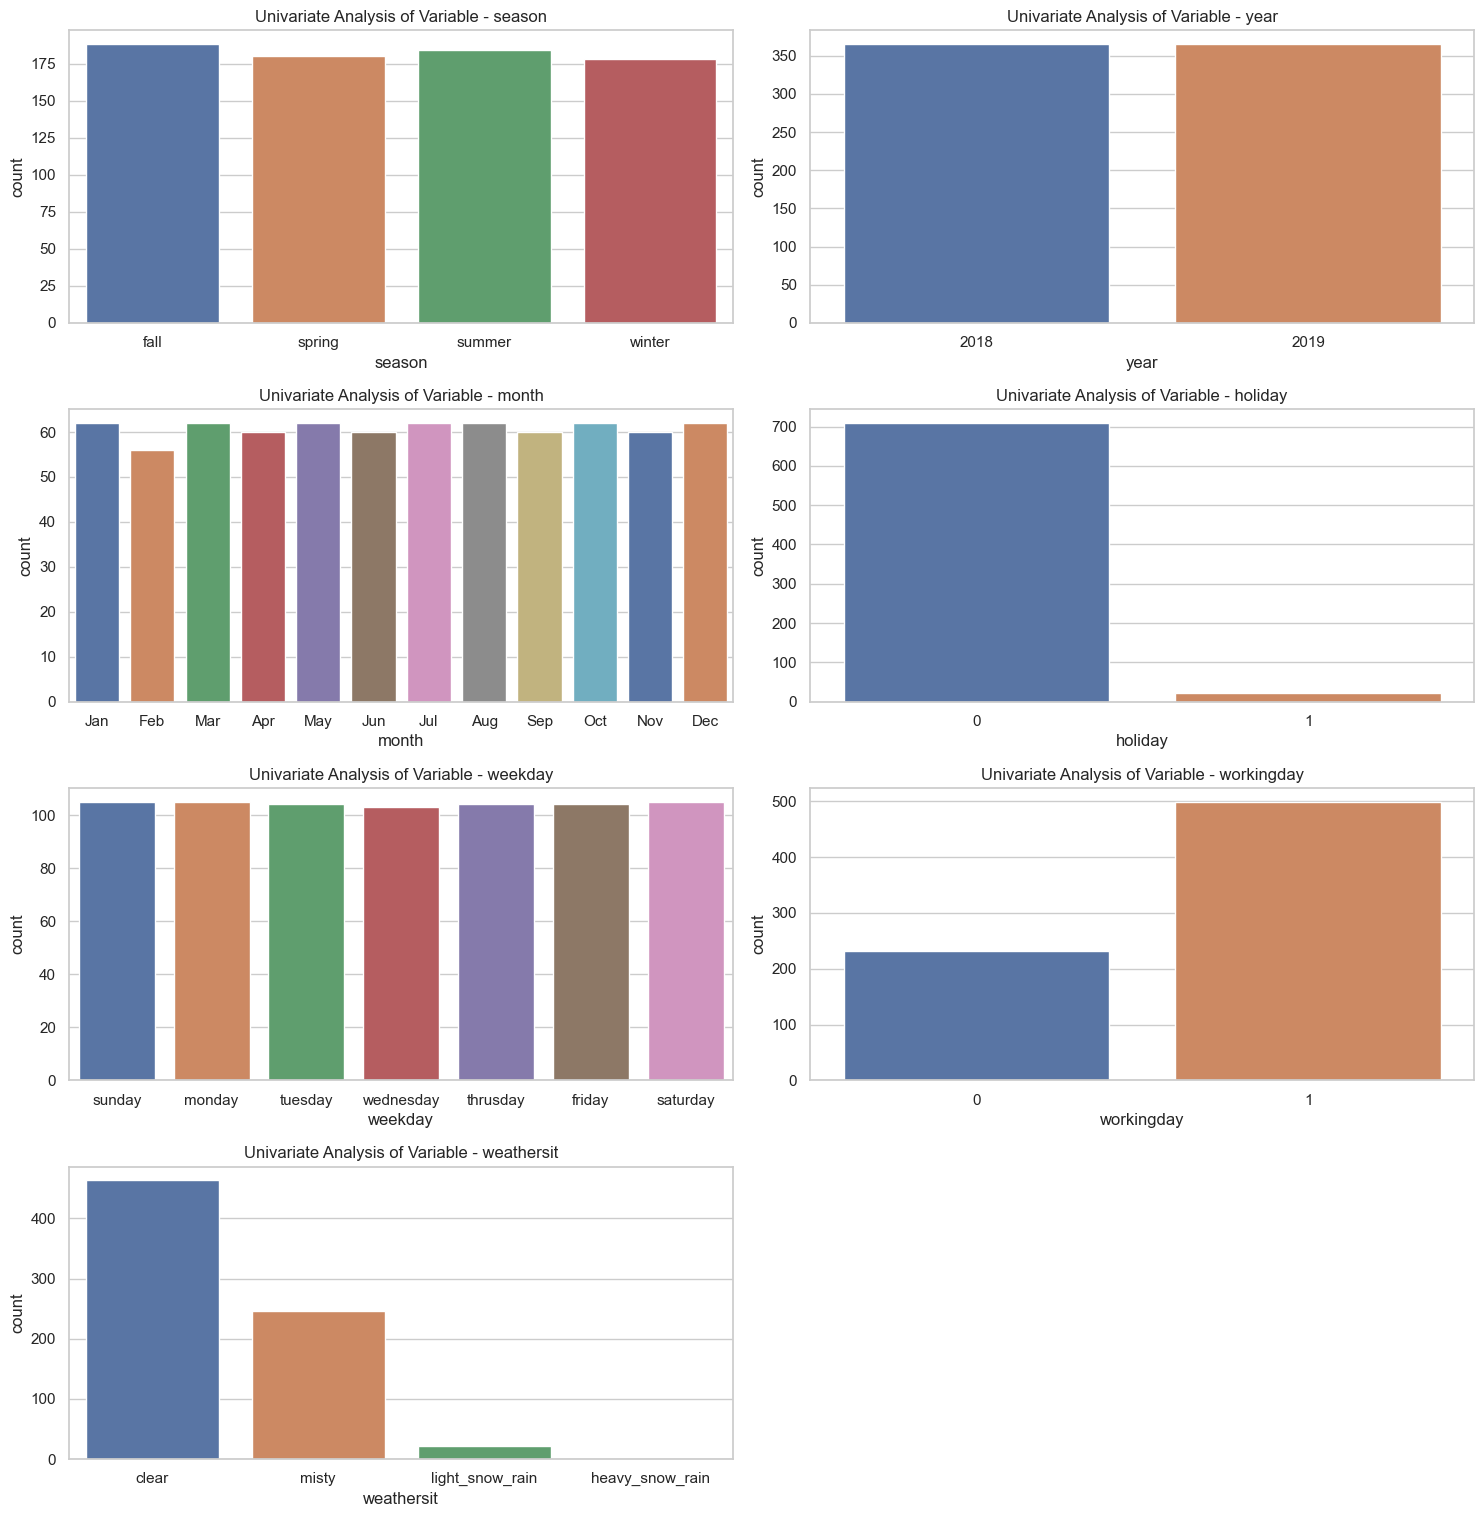

In [26]:
plt.figure(figsize=(15,30))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    if col in ('year','month','weekday' ,'weathersit') :
        dictname=col+"_dict"
        sort_order=list(cat_cols_dict.get(dictname).values())
    else :
        sort_order=sorted(boombikes[col].unique())
    sns.countplot( data=boombikes , x=col , palette='deep' ,order=sort_order)
    plt.title( f'Univariate Analysis of Variable - {col}' )
plt.tight_layout()
plt.show()

#### Observation -
    1. The count of observations is fairly balanced across all four seasons, yr , mnth , weekday.
    2. There are more observations on working days compared to non-working days.
    3. There are significantly more observations on non-holidays compared to holidays.

## Bivariate Analysis

### Numerical Vs Numerical

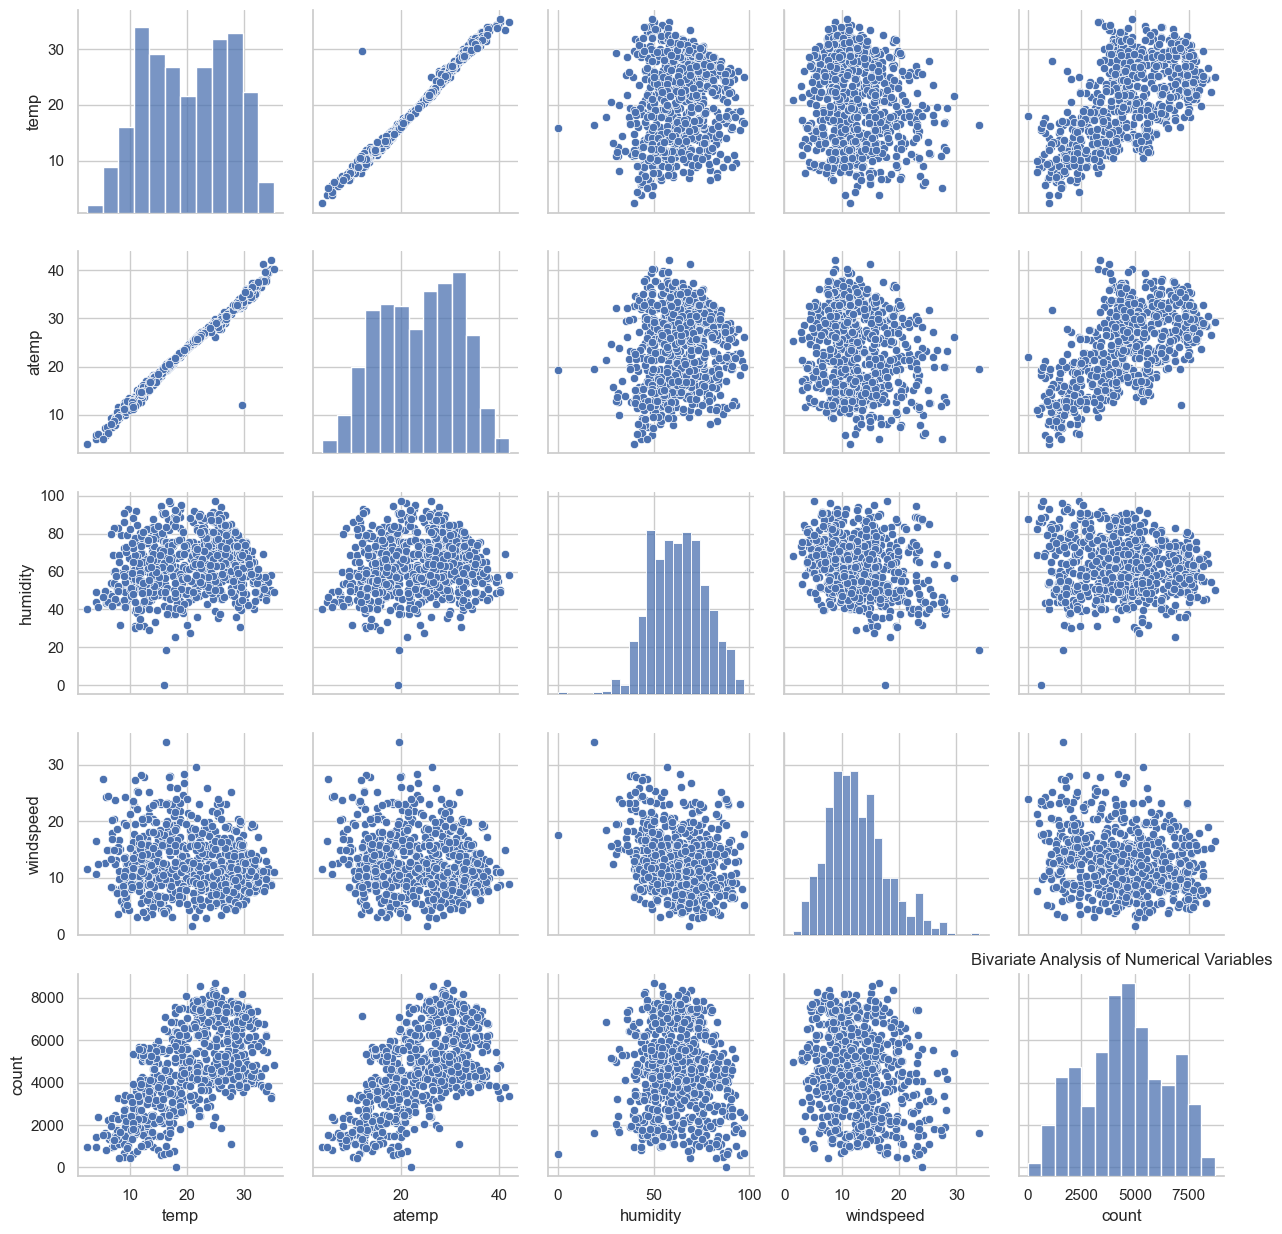

In [27]:
sns.pairplot(boombikes[num_cols] , palette='deep')
plt.title( 'Bivariate Analysis of Numerical Variables' )
plt.tight_layout()
plt.show()

#### Observartion 
    1. Temperature (temp) , Feeling Temperature (atemp) vs Count (cnt): There appears to be a positive correlation with bike rental count.
    2. Humidity (hum) , indspeed vs Count (cnt) : The scatter plot shows  a wide spread of points, suggesting a weak correlation or slightly negative correlation
    3. Casual , Registered vs Count (cnt) : A strong positive correlation is observed 


###  Numerical Vs Categorical

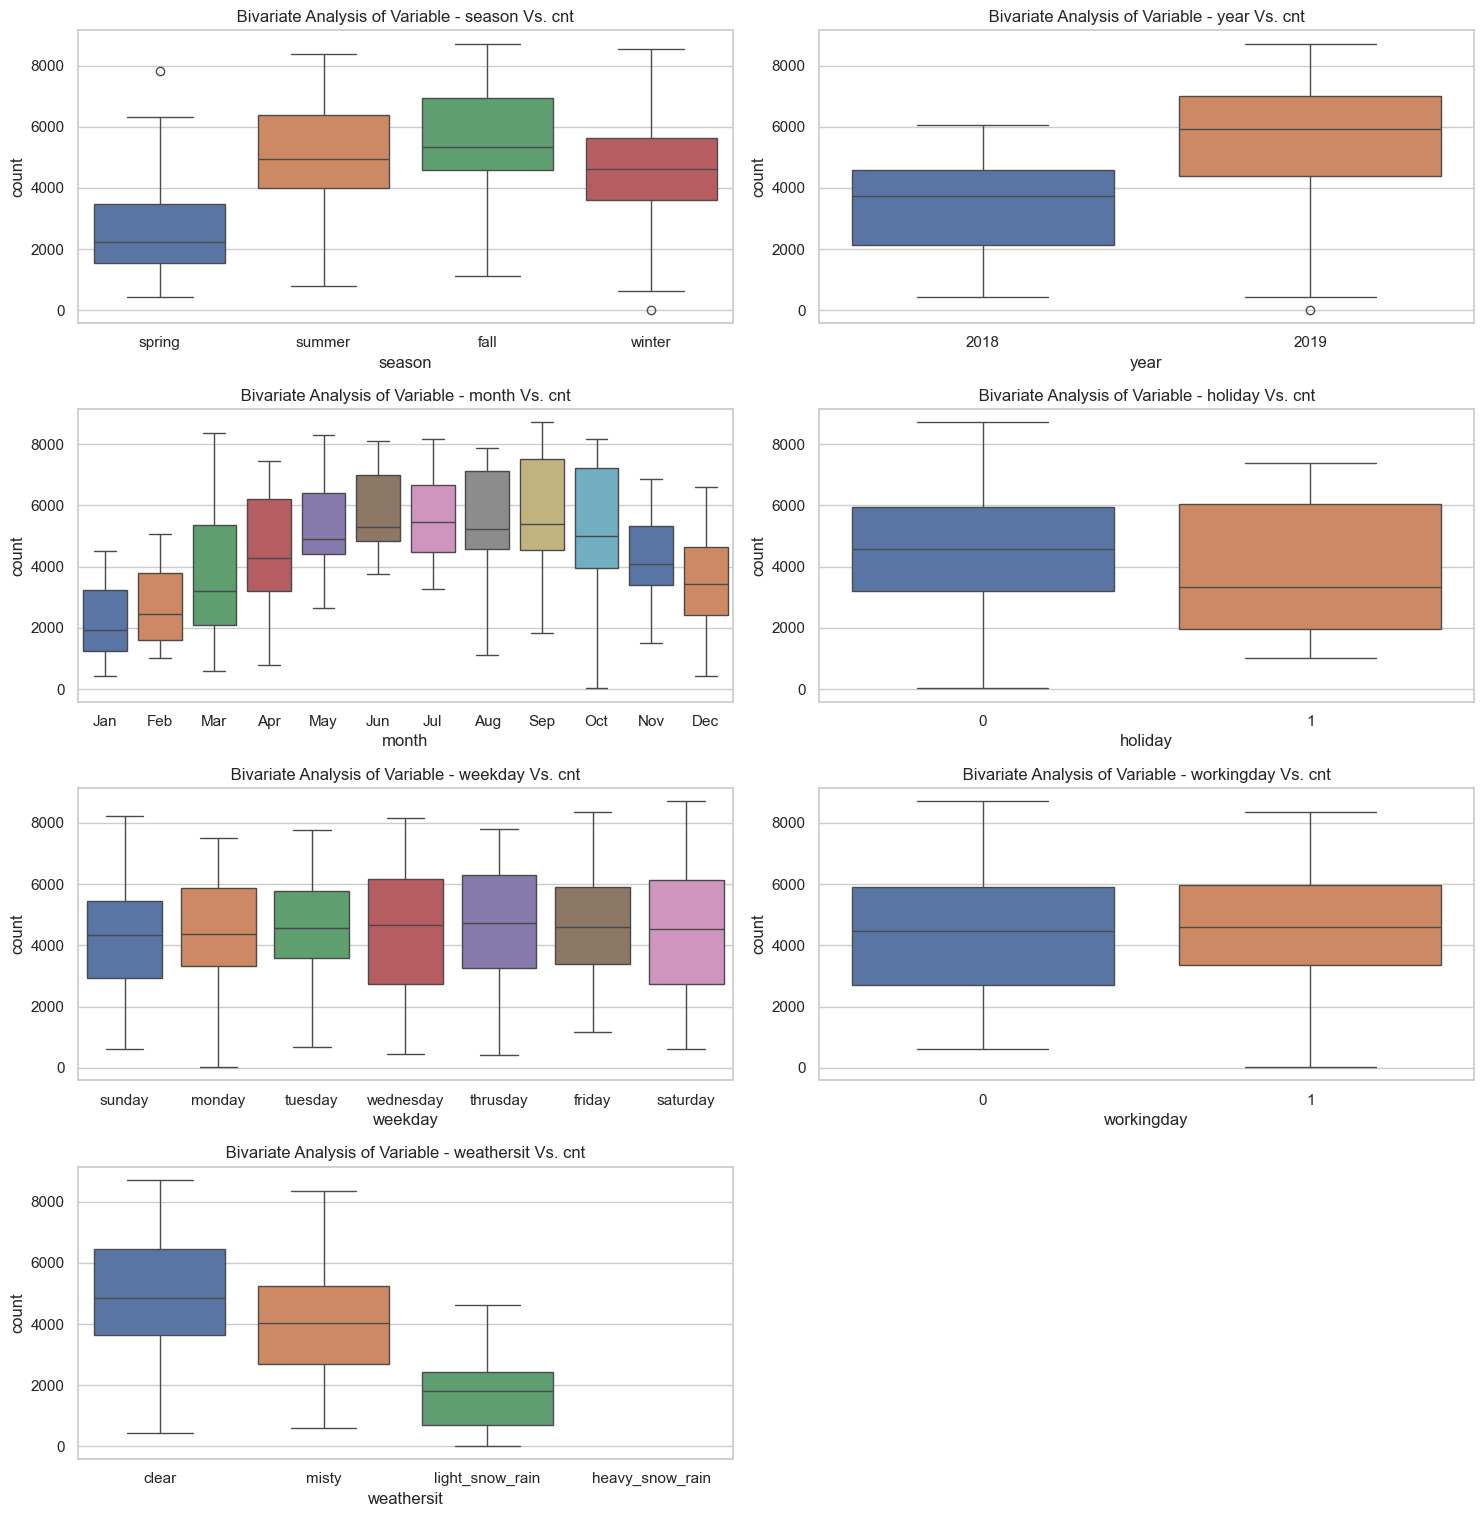

In [28]:
plt.figure(figsize=(15,30))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    if col in ('year','month','weekday' , 'season' , 'weathersit') :
        dictname=col+"_dict"
        sort_order=list(cat_cols_dict.get(dictname).values())
    else :
        sort_order=sorted(boombikes[col].unique())
    sns.boxplot(x=boombikes[col] , y=boombikes["count"] , palette='deep' ,order=sort_order)
    plt.title( f' Bivariate Analysis of Variable - {col} Vs. cnt ' )
plt.tight_layout()
plt.show()

#### Observations :
    1. Season vs Count (cnt): Season 3 shows the highest median rental count, while season 1 has the lowest.
    2. Year (yr) vs Count (cnt): The median rental count is higher in the second year (1) compared to the first year (0).
    3. Month (mnth) vs Count (cnt): Rental counts are higher during the middle of the year, with peaks around June, July, and September, and lower counts in January.
    4. Holiday vs Count (cnt): Non-holidays (0) have higher median rental counts compared to holidays (1).
    5. Weekday vs Count (cnt): The rental counts are relatively consistent across all weekdays.
    6. Working day vs Count (cnt): Working days (1) have a higher median rental count compared to non-working days (0), indicating higher bike usage on workdays.
    7. Weathersit vs Count (cnt): The best weather situation (1) has the highest median rental count, while the worst weather situation (3) shows the lowest.

## Multivariate Analysis

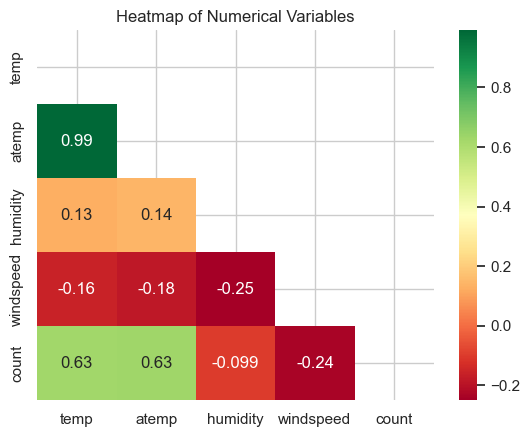

In [29]:
mask = np.triu(boombikes[num_cols].corr())
sns.heatmap(boombikes[num_cols].corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

#### Observations-
    1. Strong Positive Correlations:
        - Temperature (temp) with Count (cnt)
        - Feeling Temperature (atemp) with Count (cnt)
        - Registered Users (registered) with Count (cnt)
    2. Moderate Positive Correlations:
        - Casual Users (casual) with Count (cnt)
    3. Weak Positive Correlations:
        - Humidity (hum) with Feeling Temperature (atemp)
        - Humidity (hum) with Temperature (temp)
    4. Weak Negative Correlations:
        - Windspeed (windspeed) with Count (cnt)
        - Humidity (hum) with Count (cnt)
        - Windspeed (windspeed) with Feeling Temperature (atemp)
        - Windspeed (windspeed) with Temperature (temp)
    5. Neutral Correlations:
        - Humidity (hum) with Casual Users (casual)
        -Humidity (hum) with Registered Users (registered)
        - Windspeed (windspeed) with Casual Users (casual)
        - Windspeed (windspeed) with Registered Users (registered)

### From the Exploratory Data Analysis , we can conclude the following - 

    - Bike rental counts are lowest in spring and highest in fall, with summer (Season 3) showing peak rentals.
    - There was an increase in bike rentals in 2019 compared to 2018.
    - Data for heavy_snow_rain weather situations is missing, potentially affecting analysis of extreme weather impacts.
    - Bike rentals peak in June, July, and September, with lower counts in January.
    - More bike rentals occur on working days compared to non-working days.
    - Rental counts are higher on non-holidays compared to holidays.
    - Rental demand remains consistent across all weekdays.
    - Favorable weather (Weathersit 1) correlates with higher rental counts, while poor weather (Weathersit 3) correlates with lower counts.
    - Strong positive correlations exist between temperature (temp/atemp) and rental counts.
    - Registered users show a strong positive correlation with rental counts.
    - Casual users also positively correlate with rental counts, though less strongly than registered users.
    - Humidity and windspeeds show weak correlations with rental counts and other variables.
    - Bike rentals increase from March to June and decrease towards the end of the year.
    - Higher temperatures (temp/atemp) positively influence rental counts.

### Here , the target variable is 'cnt'. There is clearly a linear relationship between 'cnt' and 'temp' , 'atemp' ,'casual', 'registered'  . Hence we can go for a linear regression model

## Step - 6: Data Preparation Steps : Dummy Variable Creation (One Hot Encoding)

In [30]:
boombikes[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

#### We now need to create dummy variables for the below columns - 
- year
- month
- weekday
- season
- weathersit

In [31]:
dummy_data=pd.get_dummies(boombikes[['year','month','weekday','season','weathersit']], dtype=int, drop_first=True)
dummy_data.head()

,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


#### Adding dummy variables to original dataset

In [32]:
boombikes_df=pd.concat([boombikes,dummy_data],axis=1)

#### Since columns 'season','mnth','weekday','weathersit' are no longer needed for machine learning model , we can drop them

In [33]:
boombikes_df=boombikes_df.drop(['year','month','weekday','season','weathersit'], axis = 1)

In [34]:
boombikes_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## Step 7 : Train-Test Split : Splitting the Data into Training and Testing Sets

### We will now split the dataset into training and testing datasets having 70% and 30% data respectively

In [35]:
boombikes_df_train, boombikes_df_test=train_test_split( boombikes_df, train_size=0.70 , random_state=100 )
print(boombikes_df_train.shape, boombikes_df_test.shape , boombikes_df.shape)

(510, 30) (220, 30) (730, 30)


In [36]:
boombikes_df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
577,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,0,...,0,0,0,1,0,0,0,0,0,0
427,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,1,0,0,0,1
729,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,1,...,0,1,0,0,0,1,0,0,0,0
483,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,...,1,0,0,0,0,0,1,0,0,1
112,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Feature Scaling : Min-Max scaling 

In [37]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [38]:
filter_to_scale = num_cols
scaler=MinMaxScaler()
boombikes_df_train[filter_to_scale]=scaler.fit_transform(boombikes_df_train[filter_to_scale])
boombikes_df_test[filter_to_scale]=scaler.transform(boombikes_df_test[filter_to_scale])

In [39]:
boombikes_df_train=pd.DataFrame(boombikes_df_train,columns=boombikes_df_train.columns)
boombikes_df_test=pd.DataFrame(boombikes_df_test,columns=boombikes_df_test.columns)

In [40]:
boombikes_df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature scaling is done . All values are converted between 0 and 1. 

In [41]:
y_train=boombikes_df_train["count"]
X_train_df=boombikes_df_train.drop("count",axis=1)
y_test=boombikes_df_test["count"]
X_test_df=boombikes_df_test.drop("count",axis=1)

## Step 8 : Feature Selection : Using RFE and Manual Selection methods

### Manual Feature Selection methods

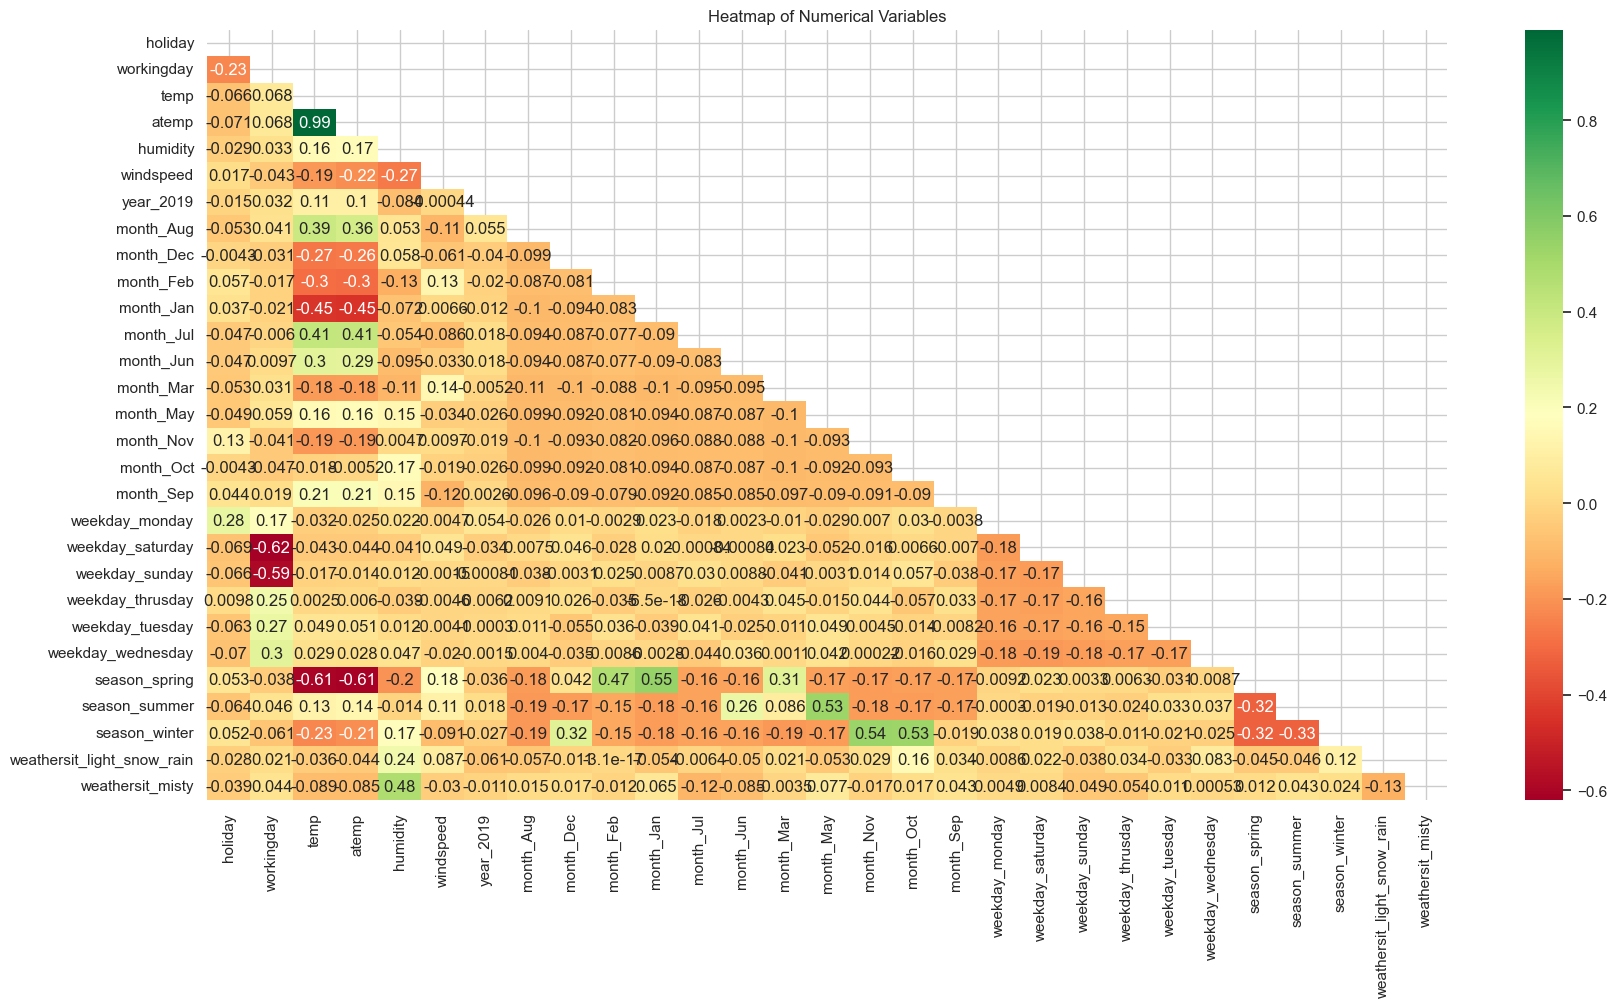

In [42]:
plt.figure(figsize=[20,10])
mask = np.triu(X_train_df.corr())
sns.heatmap(X_train_df.corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

#### Let's drop "atemp" variables as it is very highly correlated with "temp" variable.

In [43]:
X_train_df=X_train_df.drop(["atemp"],axis=1)
X_test_df=X_test_df.drop(["atemp"],axis=1)

### RFE Feature Selection Method

In [44]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(X_train_df,y_train)
print(selector.support_)
selected_features=X_train_df.columns[selector.support_]
print(selected_features)
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

[ True  True  True  True  True  True False False False  True  True False
 False False False False  True False  True False False False False  True
  True  True  True  True]
Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Jan', 'month_Jul', 'month_Sep', 'weekday_saturday',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow_rain', 'weathersit_misty'],
      dtype='object')


##  Step 9 : Model Building - Building the initial linear model

In [45]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model1=sm.OLS(np.array(y_train),X_train_sm)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        00:12:21   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2519      0.036      6.969      0.000       0.181       0.323
holiday                       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                     0.0433      0.012      3.762      0.000       0.021       0.066
temp                           0.5096      0.034     14.837      0.000       0.442       0.577
humidity                      -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
year_2019                      0.2305      0.008     28.795      0.000       0.215       0.246
month_Jan                     -0.0345      0.017     -1.989      0.047      -0.069      -0.000
month_Jul                     -0.0529      0.018     -2.931      0.004      -0.088      -0.017
month_Sep                      0.0814      0.016      4.945      0.000       0.049       0.114
weekday_saturday               0.0536      0.014      3.694      0.000       0.025       0.082
season_spring                 -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer                  0.0508      0.015      3.423      0.001       0.022       0.080
season_winter                  0.0933      0.017      5.403      0.000       0.059       0.127
weathersit_light_snow_rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_misty              -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check VIF Scores

In [46]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,84.597970
11,season_spring,5.084219
3,temp,3.889050
13,season_winter,3.591940
12,season_summer,2.648669
4,humidity,1.914281
2,workingday,1.880465
10,weekday_saturday,1.781492
15,weathersit_misty,1.568986
7,month_Jan,1.567674


### Let's drop "month_Jan" variables. High P value of coefficient ~ 0.05

In [47]:
X_train_sm=X_train_sm.drop(["month_Jan"],axis=1)
X_test_sm=X_test_sm.drop(["month_Jan"],axis=1)

In [48]:
model2=sm.OLS(np.array(y_train),X_train_sm)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        00:12:22   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2402      0.036      6.714      0.000       0.170       0.310
holiday                       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday                     0.0430      0.012      3.725      0.000       0.020       0.066
temp                           0.5277      0.033     15.884      0.000       0.462       0.593
humidity                      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
year_2019                      0.2298      0.008     28.647      0.000       0.214       0.246
month_Jul                     -0.0546      0.018     -3.019      0.003      -0.090      -0.019
month_Sep                      0.0820      0.017      4.966      0.000       0.050       0.114
weekday_saturday               0.0530      0.015      3.648      0.000       0.024       0.082
season_spring                 -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                  0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                  0.0992      0.017      5.815      0.000       0.066       0.133
weathersit_light_snow_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_misty              -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,82.346843
10,season_spring,5.019137
3,temp,3.616501
12,season_winter,3.485532
11,season_summer,2.621807
4,humidity,1.906322
2,workingday,1.880139
9,weekday_saturday,1.780912
14,weathersit_misty,1.568983
7,month_Jul,1.487517


### Let's drop "season_spring" variables. High VIF > 5

In [50]:
X_train_sm=X_train_sm.drop(["season_spring"],axis=1)
X_test_sm=X_test_sm.drop(["season_spring"],axis=1)

In [51]:
model3=sm.OLS(np.array(y_train),X_train_sm)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.23e-191
Time:                        00:12:22   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1822      0.029      6.331      0.000       0.126       0.239
holiday                       -0.0608      0.027     -2.242      0.025      -0.114      -0.008
workingday                     0.0434      0.012      3.732      0.000       0.021       0.066
temp                           0.5946      0.022     26.700      0.000       0.551       0.638
humidity                      -0.1724      0.037     -4.615      0.000      -0.246      -0.099
windspeed                     -0.1880      0.025     -7.394      0.000      -0.238      -0.138
year_2019                      0.2284      0.008     28.354      0.000       0.213       0.244
month_Jul                     -0.0453      0.018     -2.535      0.012      -0.080      -0.010
month_Sep                      0.0947      0.016      5.949      0.000       0.063       0.126
weekday_saturday               0.0533      0.015      3.642      0.000       0.025       0.082
season_summer                  0.0818      0.011      7.711      0.000       0.061       0.103
season_winter                  0.1358      0.010     13.007      0.000       0.115       0.156
weathersit_light_snow_rain    -0.2400      0.026     -9.170      0.000      -0.291      -0.189
weathersit_misty              -0.0539      0.010     -5.181      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       59.128   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.845
Skew:                          -0.647   Prob(JB):                     2.86e-28
Kurtosis:                       5.073   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,52.623561
4,humidity,1.882335
2,workingday,1.879897
9,weekday_saturday,1.780839
3,temp,1.604613
13,weathersit_misty,1.557477
7,month_Jul,1.433300
10,season_summer,1.329435
11,season_winter,1.288241
12,weathersit_light_snow_rain,1.243230


### Based on domain knowledge, holiday might have a relatively smaller impact compared to the weather variables and time-related variables (season, month, year). The holiday coefficient is -0.0608, and it has the highest p-value among the significant predictors (0.025), which might suggest a lesser impact compared to others.

In [53]:
X_train_sm_reduced=X_train_sm.drop(["holiday"],axis=1)
X_test_sm_reduced=X_test_sm.drop(["holiday"],axis=1)

In [54]:
model4=sm.OLS(np.array(y_train),X_train_sm_reduced)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.14e-191
Time:                        00:12:22   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1712      0.028      6.014      0.000       0.115       0.227
workingday                     0.0524      0.011      4.791      0.000       0.031       0.074
temp                           0.5960      0.022     26.667      0.000       0.552       0.640
humidity                      -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed                     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
year_2019                      0.2286      0.008     28.267      0.000       0.213       0.244
month_Jul                     -0.0439      0.018     -2.450      0.015      -0.079      -0.009
month_Sep                      0.0928      0.016      5.816      0.000       0.061       0.124
weekday_saturday               0.0625      0.014      4.429      0.000       0.035       0.090
season_summer                  0.0827      0.011      7.770      0.000       0.062       0.104
season_winter                  0.1355      0.010     12.930      0.000       0.115       0.156
weathersit_light_snow_rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
weathersit_misty              -0.0536      0.010     -5.129      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm_reduced.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm_reduced.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,52.623561
4,windspeed,1.882335
2,temp,1.879897
9,season_summer,1.780839
3,humidity,1.604613
7,month_Sep,1.433300
10,season_winter,1.329435
11,weathersit_light_snow_rain,1.288241
12,weathersit_misty,1.243230
8,weekday_saturday,1.190801


### Model 3 ( Result 3) appears to be slightly better in terms of R-squared, Adj. R-squared, and AIC, suggesting a marginally better fit and predictive power. However, Model 4 has a slightly better BIC and higher F-statistic, indicating a stronger overall model fit in some respects. So , we'll accept Model 4 ( Result 4) and perform further analysis

In [56]:
X_train_sm=X_train_sm_reduced
X_test_sm=X_test_sm_reduced

In [57]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.14e-191
Time:                        00:12:22   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1712      0.028      6.014      0.000       0.115       0.227
workingday                     0.0524      0.011      4.791      0.000       0.031       0.074
temp                           0.5960      0.022     26.667      0.000       0.552       0.640
humidity                      -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed                     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
year_2019                      0.2286      0.008     28.267      0.000       0.213       0.244
month_Jul                     -0.0439      0.018     -2.450      0.015      -0.079      -0.009
month_Sep                      0.0928      0.016      5.816      0.000       0.061       0.124
weekday_saturday               0.0625      0.014      4.429      0.000       0.035       0.090
season_summer                  0.0827      0.011      7.770      0.000       0.062       0.104
season_winter                  0.1355      0.010     12.930      0.000       0.115       0.156
weathersit_light_snow_rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
weathersit_misty              -0.0536      0.010     -5.129      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since all VIF values are under 3 and no p value is less than 0.02. We can cosider the above model as the best possible model, as it seems to have a very low multicolinearity(VIF) between the predictors and the p-values for all the predictors seems to be significant.
### This looks like a very acceptable model and we can consider this as the base model . Let's perform 5-fold cross-validation to evaluate the performance of the model

In [58]:
# Perform 5-fold cross-validation to evaluate model performance
cv_scores = cross_val_score(estimator, X_train_sm, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
cv_scores = -cv_scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean MSE: {cv_scores.mean()}")

Cross-Validation Scores:
[0.00781879 0.00824169 0.01021148 0.00751621 0.00872574]
Mean MSE: 0.008502782704931435


### Cross-Validation for Model Evaluation :
#### The 5-fold cross-validation yielded a mean MSE of 0.0.00850. This indicates consistent and strong predictive performance of the model across different data subsets.

### We will now conduct the Residual analysis of the model

## Step 10 : Residual Analysis of the train data

In [59]:
# 1.Predicting the Y_train value(Count) using the model
y_train_pred = result4.predict(X_train_sm)
y_train_pred.head()

instant
577    0.720173
427    0.514701
729    0.335598
483    0.605335
112    0.258422
dtype: float64

In [60]:
# 2.Calculating Residual value
residual = y_train - y_train_pred
residual.head()

instant
577    0.107485
427   -0.049446
729   -0.131503
483   -0.122362
112   -0.067326
dtype: float64

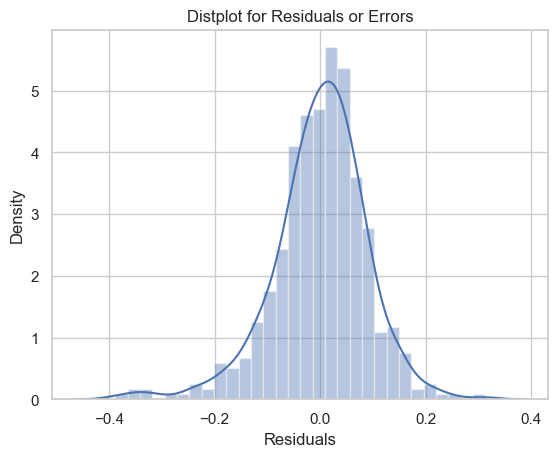

In [61]:
# 3.Visualising the residual value to check if the model not failing any conditions
sns.distplot(residual)
plt.xlabel('Residuals' )
plt.title('Distplot for Residuals or Errors')                 
plt.show()

### Observations :
    1. The distributions of residuals or errors suggests that the linear regression model fits the data well. The residuals being normally distributed and centered around zero are indicators of a good fit.
    2. The symmetry and centering around zero indicate that there is no systematic bias in the model's predictions. The errors are randomly distributed, which is desired.
    3. The consistent spread of the residuals implies that the assumption of homoscedasticity holds, meaning the model's predictions have constant variance across different levels of the input variables.

### Let's look the scatterplot patterns in the residuals
### Plotting the residuals (difference between y_train and y_train_pred) against y_train or y_train_pred can reveal patterns in the errors.

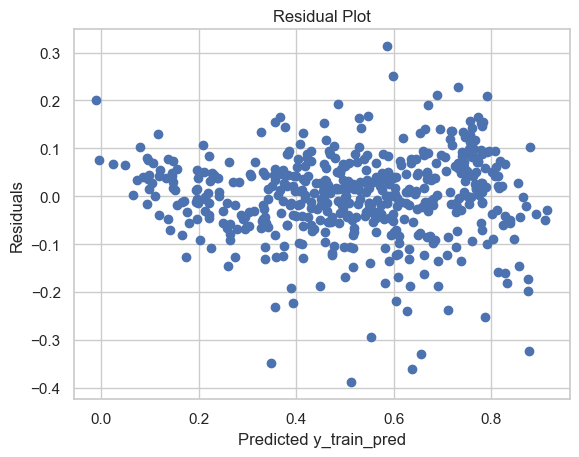

In [62]:
plt.scatter(y_train_pred, residual)
plt.xlabel('Predicted y_train_pred')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Observation:
    1. The residuals are randomly scattered around the horizontal axis (y=0). This indicates that the model is not biased and is capturing the underlying data pattern well.
    2. The residuals do not show increasing or decreasing spread across the predicted values, supporting the assumption of homoscedasticity, which is important for the validity of statistical tests in regression.
    3. The lack of patterns also suggests that the residuals are independent of each other, meeting another assumption of linear regression.

### Let's plot y_train against y_train_pred to visualize how closely the predicted values align with the actual values. Each point on the plot represents an instance from the training data.

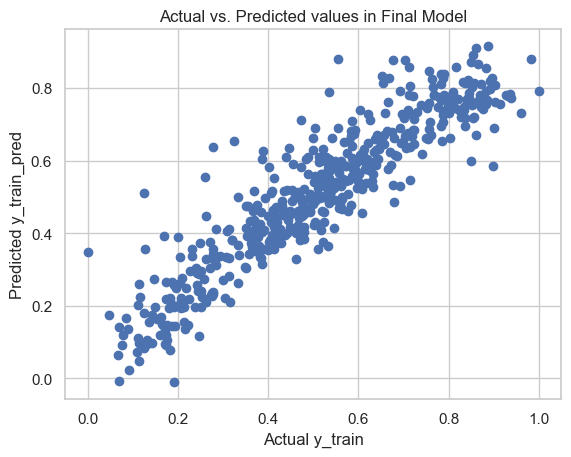

In [63]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train_pred')
plt.title('Actual vs. Predicted values in Final Model')
plt.show()

### Observations :
    1. The model predicts perfectly, all points lie on the 45-degree line (y = x). 
    2. No cluster of points is observed closely around the 45-degree line (y = x).
    3. The model likely captures the underlying patterns in the data well.

### Let's compare the distributions of y_train and y_train_pred using histograms or density plots to see how similar they are.

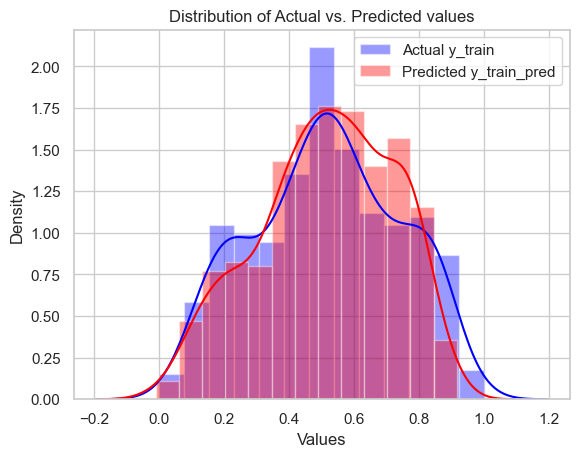

In [64]:
sns.distplot(y_train,color='blue', label='Actual y_train')
sns.distplot(y_train_pred, color='red', label='Predicted y_train_pred')
plt.xlabel('Values')
plt.legend()
plt.title('Distribution of Actual vs. Predicted values')
plt.show()


### Observations :
    1. The distributions of the actual values (Actual_y_train) and the predicted values (Predicted_y_train_pred) are quite similar. This suggests that the model captures the general trend of the data well.
    2. Both distributions have peaks around the same value, indicating that the model predicts the most frequent values in the training data accurately.
    3. The tails of the predicted distribution seem to cover a similar range as the actual distribution, indicating that the model does not excessively overpredict

### Scatter plot of actual vs. predicted values with an ideal line for reference

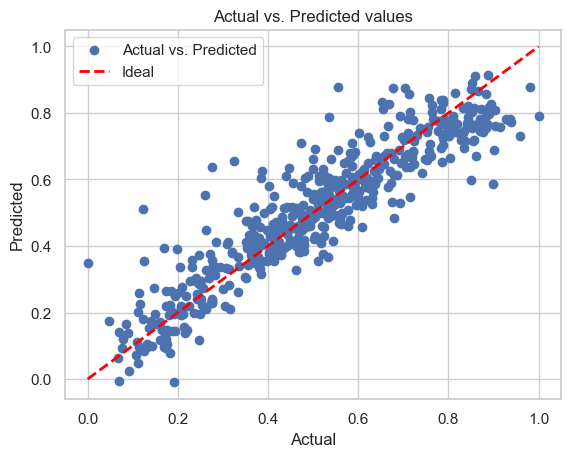

In [65]:
plt.scatter(y_train, y_train_pred , label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()

### Observations:
    1. The scatter plot shows a strong linear relationship between the actual and predicted values, indicating that the model predictions are generally accurate.
    2. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values (i.e., y = x).
    3. The points are closely clustered around this ideal line, which suggests good predictive accuracy.

## Step 11 : Making Predictions using the final linear model

### We can now start to make predictions using the final mode

In [66]:
y_test_pred=result4.predict(X_test_sm)
y_test_pred.head()

instant
185    0.441165
536    0.938831
300    0.404425
222    0.610315
153    0.638256
dtype: float64

In [67]:
# R^2 Score of the test Data 
r_squared_test = round(r2_score(y_test, y_test_pred), 4)
print(r_squared_test)

0.807


### The R-squared is approximately 80.70 % and not too different from the model we had build on the training data. Overall, the model demonstrates strong performance and reliability for predicting the target variable in this context.

### This is making it a very acceptable choice . Therefore, we can consider this as our base model.

## Step 12 : Steps for Further Model Refinement and Optimization

### One approach to enhance our model is by dropping the least significant variables. We'll begin by evaluating the impact of removing the "month_Jul" variable.

In [68]:
# Dropping least significant variable
X_train_reduced = X_train_sm.drop(columns=['month_Jul'])
X_test_reduced = X_test_sm.drop(columns=['month_Jul'])

# Refit the model
estimator.fit(X_train_reduced, y_train)
y_pred_train_reduced = estimator.predict(X_train_reduced)
y_pred_test_reduced = estimator.predict(X_test_reduced)

# Recalculate R-squared
r_squared_train=r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
train_r2_reduced = r2_score(y_train, y_pred_train_reduced)
test_r2_reduced = r2_score(y_test, y_pred_test_reduced)

print(f"Train R-squared before reduction :{r_squared_train * 100:.2f}% , after reduction: {train_r2_reduced * 100:.2f}%")
print(f"Test R-squared before reduction :{r_squared_test * 100:.2f}% , after reduction: {test_r2_reduced * 100:.2f}%")


Train R-squared before reduction :84.32% , after reduction: 84.13%
Test R-squared before reduction :80.70% , after reduction: 80.66%


### Observation :
    The marginal reduction in both train and test R-squared values suggests that "month_Jul" had a relatively minor impact on the model's predictive power. 

In [69]:
# Perform 5-fold cross-validation to evaluate model performance
train_cv_scores = cross_val_score(estimator, X_train_sm, y_train, cv=5, scoring='neg_mean_squared_error')
test_cv_scores = cross_val_score(estimator, X_test_sm, y_test, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
train_cv_scores = -train_cv_scores
test_cv_scores = -test_cv_scores
print("Before  reduction: Train Cross-Validation Scores:")
print(train_cv_scores )
print("Before  reduction: Test Cross-Validation Scores:")
print(test_cv_scores )

# Perform 5-fold cross-validation to evaluate reduced model performance
train_reduced_cv_scores = cross_val_score(estimator, X_train_reduced, y_train, cv=5, scoring='neg_mean_squared_error')
test_reduced_cv_scores = cross_val_score(estimator, X_test_reduced, y_test, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
train_reduced_cv_scores = -train_reduced_cv_scores
test_reduced_cv_scores = -test_reduced_cv_scores
print("After reduction: Train Cross-Validation Scores:")
print(test_reduced_cv_scores )
print("After reduction: Test Cross-Validation Scores:")
print(test_reduced_cv_scores )

print(f" Before  reduction: Train Mean MSE: {train_cv_scores.mean() * 100:.2f}% After reduction: Train Mean MSE: {train_reduced_cv_scores.mean() * 100:.2f}%")
print(f" Before  reduction: Test Mean MSE: {test_cv_scores.mean() * 100:.2f}% After reduction: Test Mean MSE: {test_reduced_cv_scores.mean() * 100:.2f}%")

Before  reduction: Train Cross-Validation Scores:
[0.00781879 0.00824169 0.01021148 0.00751621 0.00872574]
Before  reduction: Test Cross-Validation Scores:
[0.01187209 0.01178545 0.00828584 0.00866857 0.00986611]
After reduction: Train Cross-Validation Scores:
[0.01191825 0.01181528 0.0082231  0.00871414 0.00974844]
After reduction: Test Cross-Validation Scores:
[0.01191825 0.01181528 0.0082231  0.00871414 0.00974844]
 Before  reduction: Train Mean MSE: 0.85% After reduction: Train Mean MSE: 0.85%
 Before  reduction: Test Mean MSE: 1.01% After reduction: Test Mean MSE: 1.01%


### Obsrvation:
    The model's performance metrics (cross-validation scores and mean MSE) show no significant improvement or degradation after the reduction

In [70]:
model5=sm.OLS(np.array(y_train),X_train_reduced)
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.10e-191
Time:                        00:12:26   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1705      0.029      5.960      0.000       0.114       0.227
workingday                     0.0533      0.011      4.849      0.000       0.032       0.075
temp                           0.5710      0.020     28.558      0.000       0.532       0.610
humidity                      -0.1629      0.038     -4.340      0.000      -0.237      -0.089
windspeed                     -0.1864      0.026     -7.268      0.000      -0.237      -0.136
year_2019                      0.2294      0.008     28.258      0.000       0.213       0.245
month_Sep                      0.1027      0.016      6.619      0.000       0.072       0.133
weekday_saturday               0.0628      0.014      4.433      0.000       0.035       0.091
season_summer                  0.0910      0.010      8.984      0.000       0.071       0.111
season_winter                  0.1396      0.010     13.430      0.000       0.119       0.160
weathersit_light_snow_rain    -0.2426      0.026     -9.197      0.000      -0.294      -0.191
weathersit_misty              -0.0538      0.011     -5.124      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       72.400   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.721
Skew:                          -0.755   Prob(JB):                     1.03e-36
Kurtosis:                       5.349   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_reduced.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_reduced.values,i) 
                 for i in range(len(X_train_reduced.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,51.106843
3,humidity,1.867536
1,workingday,1.651214
7,weekday_saturday,1.641290
11,weathersit_misty,1.557080
2,temp,1.270660
9,season_winter,1.254979
10,weathersit_light_snow_rain,1.239418
8,season_summer,1.191625
4,windspeed,1.181038


### Let's compare the OLS Regression result of Model 4 ( Result 4 ) and Model 5 ( Result 5 )

In [72]:
## Re-calculating the co-efficients for ease
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.14e-191
Time:                        00:12:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1712      0.028      6.014      0.000       0.115       0.227
workingday                     0.0524      0.011      4.791      0.000       0.031       0.074
temp                           0.5960      0.022     26.667      0.000       0.552       0.640
humidity                      -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed                     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
year_2019                      0.2286      0.008     28.267      0.000       0.213       0.244
month_Jul                     -0.0439      0.018     -2.450      0.015      -0.079      -0.009
month_Sep                      0.0928      0.016      5.816      0.000       0.061       0.124
weekday_saturday               0.0625      0.014      4.429      0.000       0.035       0.090
season_summer                  0.0827      0.011      7.770      0.000       0.062       0.104
season_winter                  0.1355      0.010     12.930      0.000       0.115       0.156
weathersit_light_snow_rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
weathersit_misty              -0.0536      0.010     -5.129      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation :
    Both models perform similarly with minor differences. Model 4 has a marginally better fit based on R-squared, Adjusted R-squared, Log-Likelihood, AIC, and BIC. The removal of the variable month_Jul in Model 5 simplifies the model slightly but does not significantly impact the overall performance.

### Based on the slight performance edge and comprehensive inclusion of variables, Model 4 is generally preferable unless the simplicity of Model 5 offers significant advantages for your specific use case or interpretation needs.

## Step 13 : Model Evaluation

### Let us now build the linear equation for the final model
#### Based on the above coefficients, the equation stands as below - 

count = 0.1712 + 0.0524 * workingday + 0.596 * temp − 0.1709 * humidity − 0.1888 * windspeed + 0.2286 * year_2019 − 0.0439 * month_Jul + 0.0928 * month_Sep + 0.0625 * weekday_saturday + 0.0827 * season_summer + 0.1355 * season_winter − 0.2391 * weathersit_light_snow_rain − 0.0536 * weathersit_misty

### Based on the regression equation and the coefficients, we can infer the following about bike demand:
    1. Summer and Winter: Bike demands are high during both summer and winter seasons due to the positive coefficients for season_summer (0.0827) and season_winter (0.1355).
    2. Month of September: Bike demands increase during the month of September, as indicated by the positive coefficient for month_Sep (0.0928). This increase is particularly noticeable if it is a working day (positive coefficient for workingday at 0.0524) and even on Saturdays (positive coefficient for weekday_saturday at 0.0625).
    3. Temperature: There is a positive relationship with temperature, shown by the positive coefficient for temp (0.596). Higher temperatures lead to higher bike demands.
    4. Year-on-Year Increase: The bike demand has increased from 2018 to 2019, as evidenced by the positive coefficient for year_2019 (0.2286).
    5. Rainy and Snowy Seasons: During rainy and snowy conditions, bike demands decrease. This is reflected by the negative coefficients for weathersit_light_snow_rain (-0.2391) and weathersit_misty (-0.0536). The decrease is especially noted during the months of July and from November to January, suggested by the negative coefficient for month_Jul (-0.0439).
    6. Windspeed: High windspeed negatively affects bike sharing demands, leading to a decrease in bike usage, as indicated by the negative coefficient for windspeed (-0.1888).

### We will plot y_test vs y_pred to check the spread

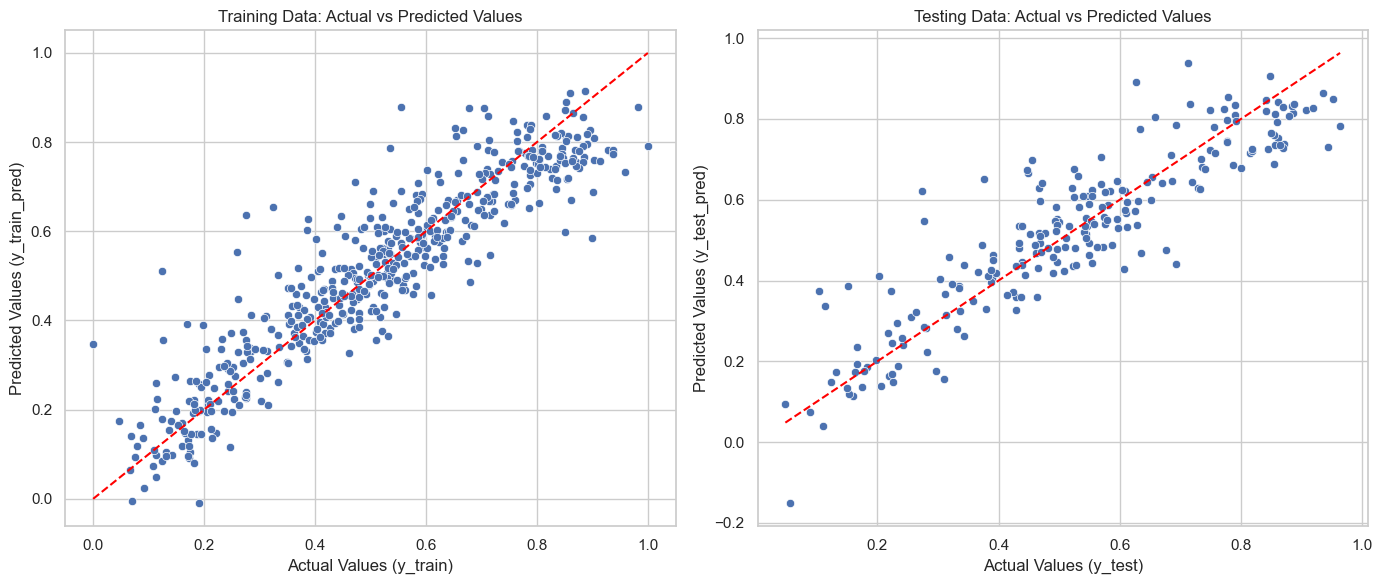

In [73]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.title('Training Data: Actual vs Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  

# Subplot for testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Testing Data: Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Calculating Adjusted-R^2 value for Train and Test a dataset
adjusted_r2_train = round(1-(1-train_r2)*(X_train_sm.shape[0]-1)/(X_train_sm.shape[0]-X_train_sm.shape[1]-1),4)
adjusted_r2_test = round(1-(1-test_r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)

print(f'Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}')
print(f'Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}')
print(f'Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')
print(f'Train Adjusted R²: {adjusted_r2_train:.4f}, Test Adjusted R²: {adjusted_r2_test:.4f}')

Train MAE: 0.0657, Test MAE: 0.0722
Train RMSE: 0.0888, Test RMSE: 0.0961
Train R²: 0.8432, Test R²: 0.8070
Train Adjusted R²: 0.8391, Test Adjusted R²: 0.7948


### Comparision between Training and Testing dataset:
- Train dataset MAE			: 0.0657 , Test dataset MAE				: 0.0722
- Train dataset RMSE		: 0.0888 , Test dataset RMSE			: 0.0961
- Train dataset R²			: 0.8432 , Test dataset R²				: 0.8070
- Train dataset adjusted R²	: 0.8391 , Test dataset adjusted R²		: 0.7948

### Observations:
    1. The model performs well on both the training and testing datasets, with slight degradation in performance on the test data.
    2. The low MAE and RMSE values suggest that the model's predictions are accurate and close to the actual values.
    3. The high R-squared and adjusted R-squared values indicate that a large proportion of the variance in the target variable is explained by the model, both in the training and testing datasets.
    4. Overall, the model generalizes well to new data and provides reliable predictions.